# The Dolomiti systems 🏔️



#### Set up

In [1]:
import geopandas as gpd
import contextily as ctx
import pandas as pd
import matplotlib.pyplot as plt
import folium

## Definition

The Dolomites are a group of mountain ranges located in the Eastern Alps. The term Dolomites derives from the particular rock from which these mountains are mainly composed: the Dolomia.

In 2009 UNESCO declared the Dolomites a World Heritage Site for their aesthetic and landscape value and for their scientific importance in geology and geomorphology.
However, the Dolomites are not an unbroken chain of peaks, but nine mountain systems separated by valleys, rivers and other mountain groups. These systems are in fact distributed over several regions and provinces of North-Eastern Italy.

![](https://www.dolomitiunesco.info/wp-content/uploads/2014/07/Schermata-2019-01-22-alle-11.04.28-980x338.png)

## Explore Dolomiti systems data
Geographic data are available on the *Dolomiti UNESCO Foundation*'s [offical website](https://www.dolomitiunesco.info/). The data are available in KML format, since the [official map](https://www.google.com/maps/d/u/0/viewer?mid=1j-JGXZ0VrwtHSSYyz3wLsYSm-u6MJxx-&hl=it&ll=46.364811013146635%2C11.45698054255762&z=9) is build in Google My Maps.

### From KML to geopandas GeoDataFrame

Read the KML file as GeoDataFrame using `fiona` driver.

In [2]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
geodf_dolomities = gpd.read_file('data\I nove Sistemi delle Dolomiti UNESCO.kml', driver='KML')
geodf_dolomities

,Name,Description,geometry
0,"Sistema 1 - Pelmo, Croda da Lago","Esplora il Sistema 1 Pelmo, Croda da Lago su<b...","POLYGON Z ((12.12142 46.40488 0.00000, 12.1214..."
1,Sistema 2 - Marmolada,Esplora il Sistema 2 Marmolada su<br>http://ww...,"POLYGON Z ((11.82319 46.45296 0.00000, 11.8221..."
2,"Sistema 3 - Pale di San Martino, San Lucano, D...","Esplora il Sistema 3 Pale di San Martino, San ...","POLYGON Z ((11.98683 46.31720 0.00000, 11.9880..."
3,Sistema 4 - Dolomiti friulane e d'Oltre Piave,Esplora il Sistema 4 Dolomiti friulane e d'Olt...,"POLYGON Z ((12.51205 46.42487 0.00000, 12.5120..."
4,Sistema 5 - Dolomiti settentrionali,Esplora il Sistema 5 Dolomiti settentrionali s...,"MULTIPOLYGON Z (((12.16274 46.57915 0.00000, 1..."
5,Sistema 6 - Puez-Odle,Esplora il Sistema 6 Puez-Odle su<br>http://ww...,"POLYGON Z ((11.83423 46.66379 0.00000, 11.8333..."
6,"Sistema 7 - Sciliar-Catinaccio, Latemar","Esplora il Sistema 7 Sciliar-Catinaccio, Latem...","POLYGON Z ((11.51976 46.48659 0.00000, 11.5202..."
7,Sistema 8 - Bletterbach,Esplora il Sistema 8 Bletterbach su<br>http://...,"POLYGON Z ((11.41907 46.36664 0.00000, 11.4190..."
8,Sistema 9 - Dolomiti di Brenta,Esplora il Sistema 9 Dolomiti di Brenta su<br>...,"POLYGON Z ((10.97380 46.24359 0.00000, 10.9735..."


In [3]:
type(geodf_dolomities)

geopandas.geodataframe.GeoDataFrame

Check crs:

In [4]:
geodf_dolomities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Check geometry:

In [5]:
geodf_dolomities.geometry.is_valid

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
dtype: bool

Which geometry are we dealing with?

In [6]:
geodf_dolomities.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

Each Dolomiti system could be composed by one polygon or more (multipoygon).

### How large is each system?

We have no information about the area of the Dolomite systems in our GeoDataframe. We calculate it from the geometry using the function `.area` and add the results in a new column.


In [7]:
geodf_dolomities["area"] = geodf_dolomities.to_crs(epsg=32632).geometry.area # in m^2
geodf_dolomities

,Name,Description,geometry,area
0,"Sistema 1 - Pelmo, Croda da Lago","Esplora il Sistema 1 Pelmo, Croda da Lago su<b...","POLYGON Z ((12.12142 46.40488 0.00000, 12.1214...",4.315303e+07
1,Sistema 2 - Marmolada,Esplora il Sistema 2 Marmolada su<br>http://ww...,"POLYGON Z ((11.82319 46.45296 0.00000, 11.8221...",2.205786e+07
2,"Sistema 3 - Pale di San Martino, San Lucano, D...","Esplora il Sistema 3 Pale di San Martino, San ...","POLYGON Z ((11.98683 46.31720 0.00000, 11.9880...",3.165677e+08
3,Sistema 4 - Dolomiti friulane e d'Oltre Piave,Esplora il Sistema 4 Dolomiti friulane e d'Olt...,"POLYGON Z ((12.51205 46.42487 0.00000, 12.5120...",2.146157e+08
4,Sistema 5 - Dolomiti settentrionali,Esplora il Sistema 5 Dolomiti settentrionali s...,"MULTIPOLYGON Z (((12.16274 46.57915 0.00000, 1...",5.360157e+08
5,Sistema 6 - Puez-Odle,Esplora il Sistema 6 Puez-Odle su<br>http://ww...,"POLYGON Z ((11.83423 46.66379 0.00000, 11.8333...",7.930332e+07
6,"Sistema 7 - Sciliar-Catinaccio, Latemar","Esplora il Sistema 7 Sciliar-Catinaccio, Latem...","POLYGON Z ((11.51976 46.48659 0.00000, 11.5202...",9.302092e+07
7,Sistema 8 - Bletterbach,Esplora il Sistema 8 Bletterbach su<br>http://...,"POLYGON Z ((11.41907 46.36664 0.00000, 11.4190...",2.716007e+06
8,Sistema 9 - Dolomiti di Brenta,Esplora il Sistema 9 Dolomiti di Brenta su<br>...,"POLYGON Z ((10.97380 46.24359 0.00000, 10.9735...",1.113544e+08


We can rank the systems from the smaller to the bigger:

In [8]:
ranking_areas_dolomiti = geodf_dolomities.to_crs(epsg=32632).sort_values(by=['area'], ascending=False) 
ranking_areas_dolomiti

,Name,Description,geometry,area
4,Sistema 5 - Dolomiti settentrionali,Esplora il Sistema 5 Dolomiti settentrionali s...,"MULTIPOLYGON (((742324.187 5163258.841, 742323...",5.360157e+08
2,"Sistema 3 - Pale di San Martino, San Lucano, D...","Esplora il Sistema 3 Pale di San Martino, San ...","POLYGON ((729947.319 5133628.347, 730033.860 5...",3.165677e+08
3,Sistema 4 - Dolomiti friulane e d'Oltre Piave,Esplora il Sistema 4 Dolomiti friulane e d'Olt...,"POLYGON ((769848.543 5147250.809, 769844.029 5...",2.146157e+08
8,Sistema 9 - Dolomiti di Brenta,Esplora il Sistema 9 Dolomiti di Brenta su<br>...,"POLYGON ((652162.787 5123006.485, 652139.670 5...",1.113544e+08
6,"Sistema 7 - Sciliar-Catinaccio, Latemar","Esplora il Sistema 7 Sciliar-Catinaccio, Latem...","POLYGON ((693390.708 5151197.890, 693430.404 5...",9.302092e+07
5,Sistema 6 - Puez-Odle,Esplora il Sistema 6 Puez-Odle su<br>http://ww...,"POLYGON ((716816.756 5171705.840, 716747.786 5...",7.930332e+07
0,"Sistema 1 - Pelmo, Croda da Lago","Esplora il Sistema 1 Pelmo, Croda da Lago su<b...","POLYGON ((739924.186 5143769.377, 739929.809 5...",4.315303e+07
1,Sistema 2 - Marmolada,Esplora il Sistema 2 Marmolada su<br>http://ww...,"POLYGON ((716811.394 5148249.956, 716728.801 5...",2.205786e+07
7,Sistema 8 - Bletterbach,Esplora il Sistema 8 Bletterbach su<br>http://...,"POLYGON ((686070.497 5137628.499, 686070.036 5...",2.716007e+06


In [9]:
print("The largest system is '", ranking_areas_dolomiti[ranking_areas_dolomiti.area == ranking_areas_dolomiti.area.max()].Name.values[0], "'", sep="")

The largest system is 'Sistema 5 - Dolomiti settentrionali'


As can clearly be noted from the above plot, *Sistema 5* is the biggest system.

#### Which is the total area of the Dolomiti?

The total area is obtained by summing the systems' areas:

In [10]:
total_dolomiti_area = sum(ranking_areas_dolomiti.area) # in m^2
total_dolomiti_area_km = total_dolomiti_area/10**6 # in km^2

print("The total area of the Dolomiti is ", round(total_dolomiti_area_km, 3), " km\u00b2", sep="")

The total area of the Dolomiti is 1418.805 km²


The area is consistent with that stated on the official website (142.000 ha).

In [11]:
total_dolomiti_area_ha = total_dolomiti_area_km*10**2
round(total_dolomiti_area_ha, 2)

141880.48

## Create some visualization

It is now possible to plot data in different ways, using libraries and methods seen during the lessons.

### Static plot

Finally we show how our data looks with a simple static plot. Moreover, we add a `contextily`'s basemap to give a geographical and morphological background.

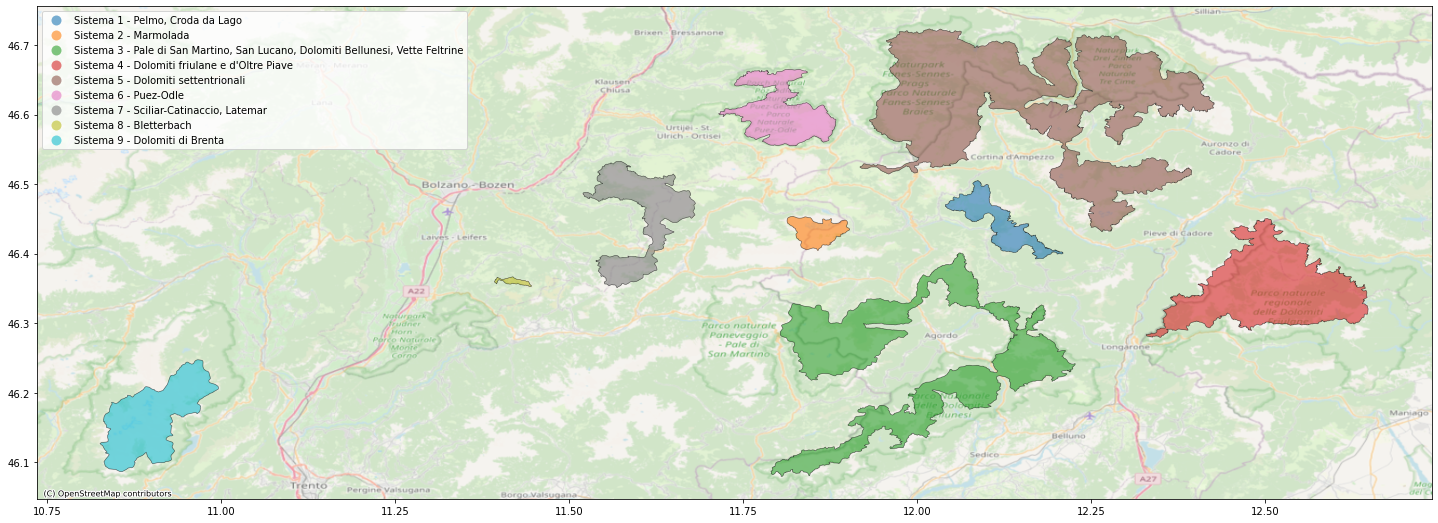

In [12]:
# static map with legend and basemap
base = geodf_dolomities.plot(
    column='Name',
    categorical=True,
    legend=True,
    figsize=(25,15),
    cmap="tab10",
    edgecolor="k",
    lw=0.6,
    alpha=0.6,
    legend_kwds = {'loc': "upper left"}
    )

ctx.add_basemap(base, crs=geodf_dolomities.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.7)


### Interactive map:

We can use `folium` to create interactuve maps:

In [13]:
# compute centroids for set the center of folium maps
geodf_dolomities["centroids"] = geodf_dolomities.to_crs(epsg=32632).centroid

In [14]:
map = folium.Map(location=[geodf_dolomities.centroids.to_crs(epsg=4326).y.mean(), geodf_dolomities.centroids.to_crs(epsg=4326).x.mean()], zoom_start=9, control_scale=True)

for _, r in geodf_dolomities.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Name']).add_to(geo_j)
    geo_j.add_to(map)

folium.TileLayer('Stamen Terrain').add_to(map)
folium.TileLayer('Stamen Toner').add_to(map)
folium.TileLayer('Stamen Water Color').add_to(map)
folium.TileLayer('cartodbpositron').add_to(map)
folium.TileLayer('cartodbdark_matter').add_to(map)
folium.LayerControl().add_to(map)

map


Or we can simply use `geopanas`' `explore()`, which is anyway built on `folium`.

In [15]:
geodf_dolomities.explore(
    column='Name',
    categorical=True,
    legend=True,
    cmap="tab10",
    )

## Save GeoDataFrame

The `geopandas`' function `to_file()` allows to save the file in different format (.shp, .geojson, .gpkg), specifying the right driver. 

In [16]:
geodf_dolomities.to_crs(epsg=4326).to_file('data\geodf_dolomities.geojson', driver='GeoJSON')

TypeError: Cannot interpret '<geopandas.array.GeometryDtype object at 0x00000157F1953160>' as a data type

This line gives an error as the `geopandas` `to_file()` function only support one geometry per feature (and we have both Polygon and Multipolygon). We then simply save `geodf_dolomities` in csv format, so that the file can be imported and converted as a GeoDataFrame in the next notebooks.

In [17]:
geodf_dolomities.to_csv('data\df_dolomities.csv', index=False)